<a href="https://colab.research.google.com/github/camiPadilla/SIS420CP/blob/main/Laboratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Implementar librerias
import os
#computacion vectorial y cientifica
import numpy as np
#libreria para graficar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D #Para graficar elementos 3D

#llama a mtplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [19]:
#cargamos datos y mostramos los  mismos por otro metodo que no sea panda
#aunque mostrando los datos ed esta forma, redondea los datos que son tipo float

data = np.loadtxt(os.path.join('/content/labo.txt'), delimiter=',')
X, y = data[:, :8], data[:, 8]
m = y.size


#imprimimos los 20 primeros datos
print('{:>8s}''{:>8s}''{:>8s}''{:>8s}''{:>8s}''{:>8s}''{:>8s}''{:>8s}''{:>10s}'.format('X[:,0]', 'X[:,1]', 'X[:,2]', 'X[:,3]', 'X[:,4]', 'X[:,5]', 'X[:,6]', 'X[:,7]', 'y' ))
print('-'*80)
for i in range(20):
  print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], y[i]))


  X[:,0]  X[:,1]  X[:,2]  X[:,3]  X[:,4]  X[:,5]  X[:,6]  X[:,7]         y
--------------------------------------------------------------------------------
       1     337     118       4       4       4      10       1         1
       2     324     107       4       4       4       9       1         1
       3     316     104       3       3       4       8       1         1
       4     322     110       3       4       2       9       1         1
       5     314     103       2       2       3       8       0         1
       6     330     115       5       4       3       9       1         1
       7     321     109       3       3       4       8       1         1
       8     308     101       2       3       4       8       0         1
       9     302     102       1       2       2       8       0         0
      10     323     108       3       4       3       9       0         0
      11     325     106       3       4       4       8       1         1
      12     327   

In [4]:
#mostramos los datos con panda ¿por que no? si se ve bonito
import pandas as pd
from datetime import datetime

In [5]:
#cargamos dataset
data = pd.read_csv('/content/adm_data.csv')

In [6]:
print(data)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
#Eliminamos Serial. no
columna_eliminar = 'Serial No.'
data.drop(columna_eliminar, axis=1, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [10]:
#Lectura de datos
X = data.iloc[:, :7]
y = data.iloc[:, 7]
m = y.size

In [11]:
print(X)
print('-'*25)
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]
-------------------------
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
  

In [12]:
#Normalizamos
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1])
  sigma = np.zeros(X.shape[1])

  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis = 0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [13]:
#Llamamos a featureNormalize con los datos ya cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media Calculada :', mu)
print('Desviación estandar calculada :', sigma)
print(X_norm)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]
Media Calculada : GRE Score            316.807500
TOEFL Score          107.410000
Univer

In [14]:
#Añade intersección a x
#(Columnas de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)

In [15]:
print(X)

[[ 1.          1.76210664  1.74697064 ...  1.16732114  1.76481828
   0.90911166]
 [ 1.          0.62765641 -0.06763531 ...  1.16732114  0.45515126
   0.90911166]
 [ 1.         -0.07046681 -0.56252785 ...  0.05293342 -1.00563118
   0.90911166]
 ...
 [ 1.          1.15124883  1.41704229 ...  1.16732114  1.42900622
   0.90911166]
 [ 1.         -0.41952842 -0.72749202 ...  0.61012728  0.30403584
  -1.09997489]
 [ 1.          1.41304503  1.58200646 ...  0.61012728  1.78160888
   0.90911166]]


In [16]:
def chance_admit(X, y, theta):
  #Inicializamos valores
  m = y.shape[0] #numero de ejemplos de entrenamiento

  J = 0
  h = np.dot(X, theta)
  J = (1/(2 * m))*np.sum(np.square(np.dot(X, theta)-y))
  return J

In [17]:
def gradienteDescentMulti(X, y, theta,alpha, num_iters):
  #Inicializamos valores
  m = y.shape[0] #numero de ejemplos de entrenamiento
   #realizamos una copia de tehta el cual sera actualizado por el descenso de la gradiente
  theta = theta.copy()
  J_history = []
  for i in range(num_iters):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(chance_admit(X, y, theta))

  return theta, J_history


theta calculado por el descenso de la gradiente: [0.71121551 0.0272611  0.023925   0.01087851 0.00392597 0.01917158
 0.047706   0.01256126]
El chance de ser admitido predecido es (usando el decenso de la gradiente): 0.5837


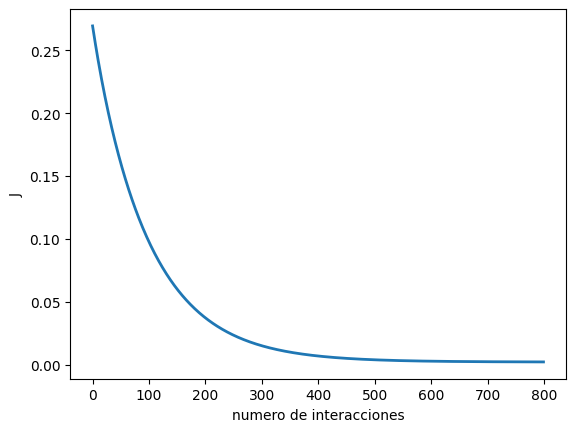

In [18]:
#Elegimos algun valor para alpha
alpha = 0.005
num_iters = 800

#Iniciamos theta e inicializamos el descenso de las gradientes
theta = np.zeros(8)
theta, J_history = gradienteDescentMulti(X, y ,theta, alpha, num_iters)

#grafica de la chance de ser admitido
pyplot.plot(np.arange(len(J_history)), J_history, lw = 2)
pyplot.xlabel('numero de interacciones')
pyplot.ylabel('J')

#Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso de la gradiente: {:s}'.format(str(theta)))

#Estimamos la chance de ser admitido
X_array = [1, 305, 107 ,1 ,3.5 ,1.5 ,8 ,1]
X_array[1: 8] = (X_array[1:8]- mu)/ sigma
chance = np.dot(X_array, theta)

print('El chance de ser admitido predecido es (usando el decenso de la gradiente): {:.4f}'.format(chance))